In [1]:
import os
os.chdir('..')

In [3]:
units = {
    2: 'DS01-005 - Unit 2', 5: 'DS01-005 - Unit 5', 12: 'DS03-012 - Unit 2', 14: 'DS03-012 - Unit 4', 
    19: 'DS03-012 - Unit 9', 21: 'DS03-012 - Unit 11', 22: 'DS03-012 - Unit 12', 29: 'DS04 - Unit 4', 
    31: 'DS04 - Unit 6', 37: 'DS05 - Unit 2', 38: 'DS05 - Unit 3', 40: 'DS05 - Unit 5', 
    47: 'DS05 - Unit 8', 49: 'DS05 - Unit 10', 53: 'DS06 - Unit 7', 55: 'DS05 - Unit 10', 
    58: 'DS07 - Unit 3', 60: 'DS07 - Unit 5', 66: 'DS08a-009 - Unit 1', 70: 'DS08a-009 - Unit 5', 
    71: 'DS08a-009 - Unit 6', 72: 'DS08a-009 - Unit 7', 77: 'DS08a-009 - Unit 12', 
    79: 'DS08a-009 - Unit 14', 80: 'DS08a-009 - Unit 15', 81: 'DS08c-008 - Unit 1', 
    82: 'DS08c-008 - Unit 2', 83: 'DS08c-008 - Unit 3', 8: 'DS01-005 - Unit 8', 10: 'DS01-005 - Unit 10', 
    11: 'DS03-012 - Unit 1', 18: 'DS03-012 - Unit 8', 23: 'DS03-012 - Unit 13', 26: 'DS04 - Unit 1',
    36: 'DS05 - Unit 1', 42: 'DS05 - Unit 7', 44: 'DS05 - Unit 9', 52: 'DS05 - Unit 9', 
    57: 'DS07 - Unit 2', 61: 'DS07 - Unit 6', 67: 'DS08a-009 - Unit 2', 68: 'DS08a-009 - Unit 3', 
    73: 'DS08a-009 - Unit 8', 89: 'DS08c-008 - Unit 9', 90: 'DS08c-008 - Unit 10', 6: 'DS01-005 - Unit 6',
    7: 'DS01-005 - Unit 7', 24: 'DS03-012 - Unit 14', 35: 'DS04 - Unit 10', 45: 'DS05 - Unit 10', 
    56: 'DS07 - Unit 1', 59: 'DS07 - Unit 4', 63: 'DS07 - Unit 8', 64: 'DS07 - Unit 9', 
    65: 'DS07 - Unit 10', 76: 'DS08a-009 - Unit 11', 87: 'DS08c-008 - Unit 7', 16: 'DS03-012 - Unit 6', 
    25: 'DS03-012 - Unit 15', 27: 'DS04 - Unit 2', 30: 'DS04 - Unit 5', 33: 'DS04 - Unit 8', 
    62: 'DS07 - Unit 7', 69: 'DS08a-009 - Unit 4', 75: 'DS08a-009 - Unit 10', 78: 'DS08a-009 - Unit 13', 
    84: 'DS08c-008 - Unit 4', 85: 'DS08c-008 - Unit 5', 86: 'DS08c-008 - Unit 6'
}


In [4]:
import pickle as pk
import numpy as np 
import pandas as pd
import scoring
from matplotlib import pyplot as plt
results = {}
results['cnn_rnn_rna'] = pk.load(open('../results/predictions/ncmapss/cnn_rnn_rna.pk', 'rb'))
results['cnn_cnn_rna'] = pk.load(open('../results/predictions/ncmapss/cnn_cnn_rna.pk', 'rb'))
results['rnn_rnn_rna'] = pk.load(open('../results/predictions/ncmapss/rnn_rnn_rna.pk', 'rb'))
results['rnn_cnn_rna'] = pk.load(open('../results/predictions/ncmapss/rnn_cnn_rna.pk', 'rb'))
results['cnn_fen'] = pk.load(open('../results/predictions/ncmapss/cnn_fen.pk', 'rb'))
results['rnn_fen'] = pk.load(open('../results/predictions/ncmapss/rnn_fen.pk', 'rb'))


colors = ['#dc4048','#f6821f','#feb913','#7acdf1','#003f6b']

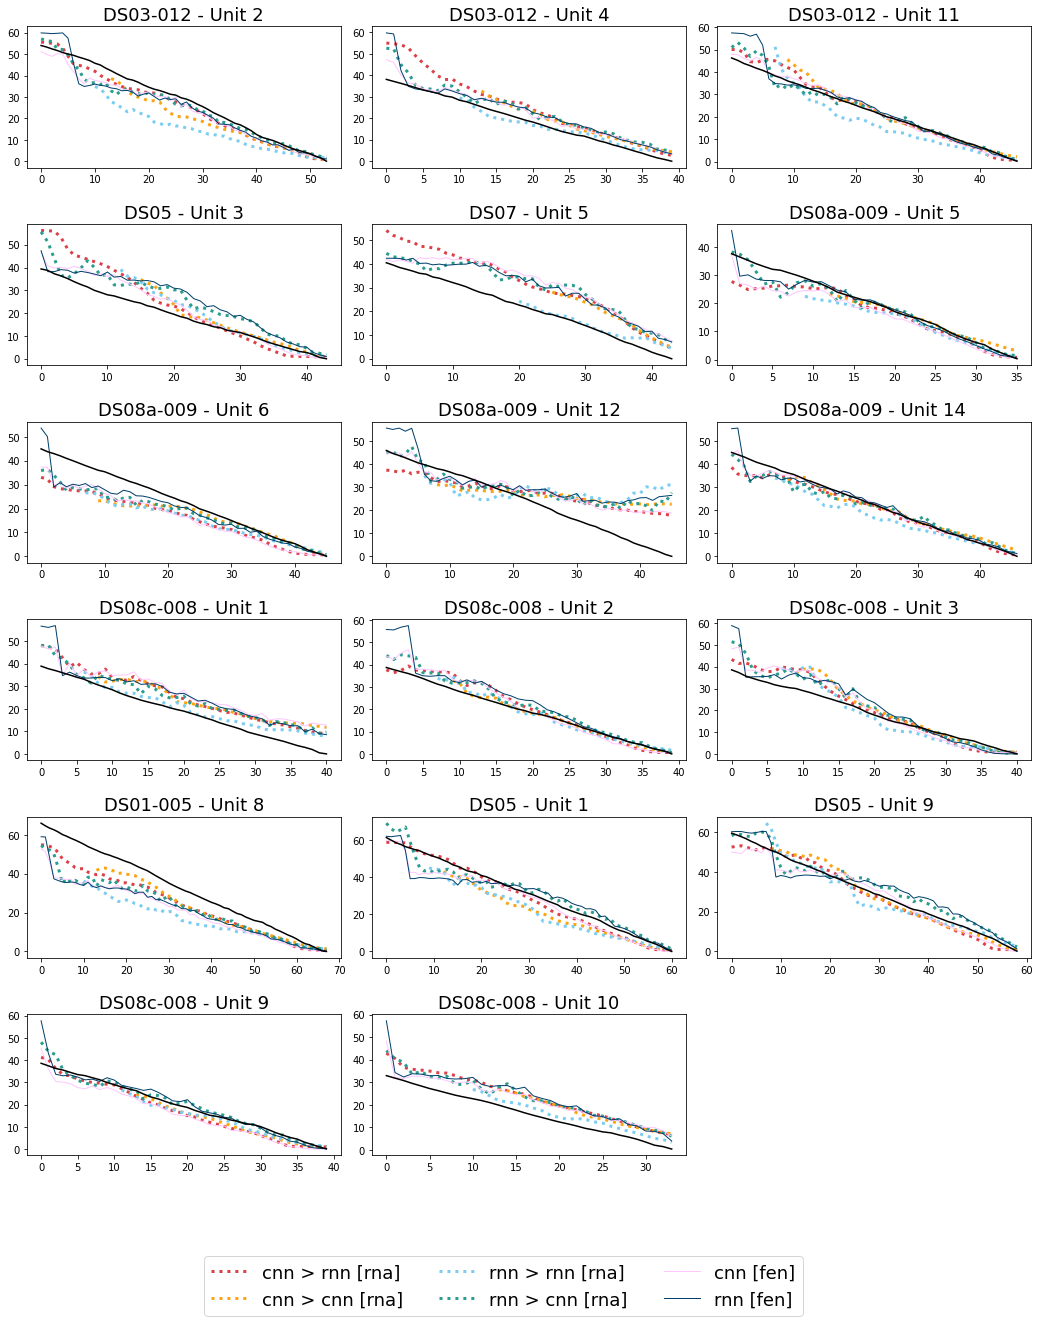

In [112]:

plt.rcParams['figure.figsize'] = [12, 8]


fig, axs = plt.subplots(6, 3, figsize=(18, 16))
    
colors = {
    'cnn_rnn_rna': '#dc4048',
    'cnn_cnn_rna':'#fca311',
    'rnn_cnn_rna':'#2a9d8f',
    'rnn_rnn_rna':'#7acdf1',
    'rnn_fen':'#003f6b', 
    'cnn_fen':'#ffc6ff',
}


axs[5, 2].set_visible(False)


    
for i, (_id, unit_name) in enumerate(units.items()):
    
    max_cycle = max(results['cnn_rnn_rna'][_id]['y'][0])    
    
    row = i //  3
    col = max(0, i - row*3)
    
    
    ax = axs[row, col]
    
    preds = {}

    for k, (key, result) in enumerate(results.items()):
        pred = np.array(results[key][_id]['p']).mean(axis=0)[:, 0]
        t_ = list(np.array(results[key][_id]['y']).mean(axis=0))[::-1]
        rul = np.array(results[key][_id]['y']).mean(axis=0)
        aux = pd.DataFrame({'pred': pred, 'time': t_, 'rul': rul}).groupby('time')[['pred', 'rul']].mean().reset_index()
        pred = aux.pred.values
        t_ = aux.time.values
        
        t_ += (max_cycle - t_.max())
        
        pred = pred[t_>=0]
        t_ = t_[t_>=0]
        
        
        
        preds[key] = pred
        label = key.split('_')
        if len(label) == 2:
            label = f"{label[0]} [{label[1]}]"
        else:
            label = f"{label[0]} > {label[1]} [{label[2]}]"
            #t_ += 20
       
        ax.plot(t_, pred, ':' if 'rna' in key else '-', 
                label=label,
                linewidth=3 if 'rna' in key else 1, 
                markersize=1, c=colors[key])
        #ax.plot(aux.time, aux.rul)
        
        if key=='cnn_rnn_rna':
            rul = aux.rul.values
            t = t_
            

    ax.plot(aux.time[aux.time>=0], aux.rul[aux.time>=0], c="black")
    
    
    ax.set_title(unit_name, fontsize=18)
        

    if row == 5 and col == 1:
        ax.legend(ncol=3, loc=4, fontsize=18, bbox_to_anchor=(0.9, -1.2, 0.5, 0.5))


plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=.1)
plt.savefig('ncmapss_charts.svg')
plt.show()

In [8]:
errors = {}
for key, data in results.items():
    model_errors = []
    for _id, values in data.items():
        y_pred = np.array(values['p']).mean(axis=0)[:, 0]
        y_true = np.array(values['y']).mean(axis=0)
        
        y_pred = y_pred[y_true < 1000]
        y_true = y_true[y_true < 1000]

        nasa_scoring = scoring.NASAScore()
        nasa_scoring.update_state(y_true, y_pred)
        model_errors.append({
            "mse": np.mean((y_pred - y_true)**2),
            "rmse": np.sqrt(np.mean((y_pred - y_true)**2)),
            "mae": np.mean(abs(y_pred - y_true)),
            "nasa": np.mean(nasa_scoring.result())

        })
        
        errors[key] = pd.DataFrame(model_errors).mean().to_dict()

In [9]:
x = []
for key, errs in errors.items():
    
    for metric, value in errs.items():
        err = {}
        err['metric'] = metric
        err['value'] = f"{np.mean(value):05.2f}"
        net = key.split('_')

        err['level'] = net[-1]
        err['net'] = net[0]
        if len(net) == 3:
            err['net'] = '-'.join(net[:2])

        #print(key, errs)
        x.append(err)

In [10]:
print(pd.DataFrame(x).sort_values(['level', 'net']).pivot(index=['metric'], 
                                                    values='value', 
                                                    columns=['level', 'net']).to_latex())

\begin{tabular}{lllllll}
\toprule
level & \multicolumn{2}{l}{fen} & \multicolumn{4}{l}{rna} \\
net &     cnn &     rnn & cnn-cnn & cnn-rnn & rnn-cnn & rnn-rnn \\
metric &         &         &         &         &         &         \\
\midrule
mae    &   08.03 &   07.88 &   04.32 &   05.22 &   06.54 &   05.70 \\
mse    &  120.99 &  114.22 &   42.18 &   50.69 &   81.53 &   70.14 \\
nasa   &   02.53 &   01.73 &   00.68 &   00.85 &   01.31 &   01.28 \\
rmse   &   09.93 &   09.82 &   05.07 &   06.08 &   08.02 &   06.68 \\
\bottomrule
\end{tabular}

